<u/>**IMPORTING REQUIRED MODULES**<u/>

In [1]:
import pandas as pd
import numpy as np
import sys
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

from torch_geometric.nn import NNConv
from torch_geometric.nn import CGConv
from torch.nn import Linear

/home/benhonore/miniconda3/envs/pe/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sys.path.append('/home/benhonore/mpnn/MPNN_NMR/')

In [3]:
import modules.scaling as scl
from modules.make_3d_graphs import make_graphs
from NNConv_model import NNConv_model

_Define the input parameters for the model. Any parameters not included will be set to the default which can be found in the NNConv_model file._

In [4]:
parameters = {'tr_epochs':200, 'batch_size':10, 'dropout':0.4, 'learning_rate': 0.001, 'embedding_size':20}

In [5]:
model = NNConv_model(id='my_test_model', model_params=parameters)

In [6]:
model.params

{'tr_epochs': 200,
 'batch_size': 10,
 'dropout': 0.4,
 'learning_rate': 0.001,
 'embedding_size': 20}

<u/>**MAKE GRAPHS**<u/>

_The input molecular graphs are made from a pandas dataframe containg the molecular information._

In [7]:
data4=pd.read_pickle('/home/benhonore/dataframes/dat_4/dataset4_atoms.pkl')

In [8]:
data4

,molecule_name,atom_index,typestr,typeint,x,y,z,conn,shift
0,FAHPAH,0,O,8,-2.6930,0.1989,-0.9482,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",284.820100
1,FAHPAH,1,H,1,-3.3525,0.7547,-0.5302,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.017446
2,FAHPAH,2,O,8,2.6896,-0.3392,-0.8545,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",284.208300
3,FAHPAH,3,H,1,3.1996,0.3223,-1.3239,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.085642
4,FAHPAH,4,C,6,1.0244,1.3952,-0.5274,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, ...",131.447832
...,...,...,...,...,...,...,...,...,...
35396,MINGAR,73,H,1,-0.8399,3.8116,3.5608,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.137793
35397,MINGAR,74,C,6,-0.7543,1.7094,3.1118,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",125.960862
35398,MINGAR,75,H,1,-1.6531,1.4707,3.6689,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.303293
35399,MINGAR,76,C,6,-0.0594,0.6953,2.4658,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",126.726608


_Returned are a list of graphs, the dictionary of parameters used to normalise the chemical shifts, a dataframe including the updated normalised chemical shifts and a list of any molecules which have failed and been skipped._

In [9]:
tr_graphs, tr_scl_dict, data, failed = make_graphs(data4)

scaling..


  0%|                                                                                           | 0/772 [00:00<?, ?it/s]/home/benhonore/mpnn/MPNN_NMR/modules/make_3d_graphs.py:94: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811740025/work/torch/csrc/utils/tensor_new.cpp:201.)
  edge_attr = torch.tensor([np.array(bond_type), np.array(dist)], dtype=torch.float32).t()
100%|█████████████████████████████████████████████████████████████████████████████████| 772/772 [07:37<00:00,  1.69it/s]


In [10]:
model.loader = model.get_input(tr_graphs)

_For example, here is the first molecular graph in the list_

772


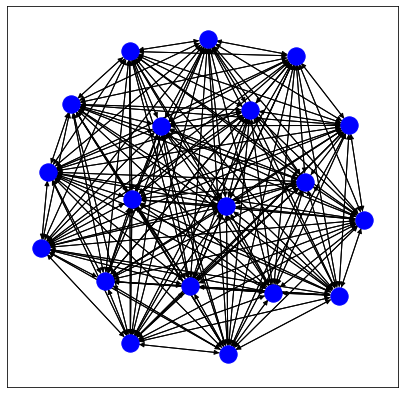

In [12]:
print(len(tr_graphs))
show_graph = to_networkx(tr_graphs[0])
visualize_graph(show_graph, 'blue')

<u/>**TRAIN**<u/>

_Now we train the model, for the number of epochs specified in the input parameters_

In [13]:
losses = model.train(model.loader)

  0%|▍                                                                                | 1/200 [00:22<1:15:48, 22.86s/it]

epoch 0 | loss 0.9298012852668762


  6%|████▍                                                                           | 11/200 [04:18<1:14:45, 23.73s/it]

epoch 10 | loss 0.483218789100647


 10%|████████▍                                                                       | 21/200 [08:27<1:14:48, 25.08s/it]

epoch 20 | loss 0.3870633542537689


 16%|████████████▍                                                                   | 31/200 [12:41<1:11:00, 25.21s/it]

epoch 30 | loss 0.2616577446460724


 20%|████████████████▍                                                               | 41/200 [16:48<1:04:45, 24.44s/it]

epoch 40 | loss 0.25622427463531494


 26%|████████████████████▍                                                           | 51/200 [20:57<1:03:09, 25.43s/it]

epoch 50 | loss 0.16569672524929047


 30%|█████████████████████████                                                         | 61/200 [25:04<57:28, 24.81s/it]

epoch 60 | loss 0.18209190666675568


 36%|█████████████████████████████                                                     | 71/200 [29:11<53:17, 24.79s/it]

epoch 70 | loss 0.12513890862464905


 40%|█████████████████████████████████▏                                                | 81/200 [33:19<49:18, 24.86s/it]

epoch 80 | loss 0.13233214616775513


 46%|█████████████████████████████████████▎                                            | 91/200 [37:24<44:30, 24.50s/it]

epoch 90 | loss 0.0972185805439949


 50%|████████████████████████████████████████▉                                        | 101/200 [41:54<45:22, 27.50s/it]

epoch 100 | loss 0.10927709937095642


 56%|████████████████████████████████████████████▉                                    | 111/200 [46:02<36:22, 24.52s/it]

epoch 110 | loss 0.08336364477872849


 60%|█████████████████████████████████████████████████                                | 121/200 [50:10<32:14, 24.49s/it]

epoch 120 | loss 0.07107876986265182


 66%|█████████████████████████████████████████████████████                            | 131/200 [54:16<28:22, 24.67s/it]

epoch 130 | loss 0.07564552128314972


 70%|█████████████████████████████████████████████████████████                        | 141/200 [58:20<23:53, 24.30s/it]

epoch 140 | loss 0.07672664523124695


 76%|███████████████████████████████████████████████████████████▋                   | 151/200 [1:02:44<21:14, 26.01s/it]

epoch 150 | loss 0.05391132831573486


 80%|███████████████████████████████████████████████████████████████▌               | 161/200 [1:06:50<15:57, 24.55s/it]

epoch 160 | loss 0.06541234999895096


 86%|███████████████████████████████████████████████████████████████████▌           | 171/200 [1:10:54<11:48, 24.42s/it]

epoch 170 | loss 0.07434579730033875


 90%|███████████████████████████████████████████████████████████████████████▍       | 181/200 [1:15:48<09:54, 31.28s/it]

epoch 180 | loss 0.06695756316184998


 96%|███████████████████████████████████████████████████████████████████████████▍   | 191/200 [1:21:44<05:33, 37.01s/it]

epoch 190 | loss 0.05534672364592552


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [1:27:20<00:00, 26.20s/it]


_We can see the internal error decreases with more training_

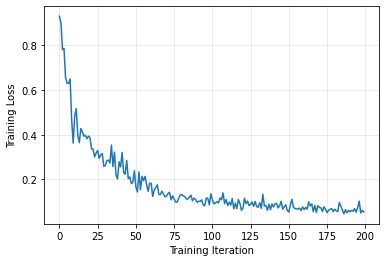

In [14]:
epochs = range(200)
fig = plt.figure()
fig.subplots_adjust()
ax1 = fig.add_subplot()
ax1.set_xlabel('Training Iteration')
ax1.set_ylabel('Training Loss')

plt.grid(alpha=0.3)
ax1.plot(epochs, losses)

<u/>**TEST**<u/>

_Now set an external test for your model: give it some new data that is hasn't seen before to predict_

In [15]:
data3=pd.read_pickle('/home/benhonore/dataframes/dat_3.1/dataset3.1_shifts.pkl')

In [16]:
te_graphs, te_scl_dict, data, failed = make_graphs(data3)

scaling..


100%|█████████████████████████████████████████████████████████████████████████████████| 326/326 [02:36<00:00,  2.09it/s]


In [19]:
model.test_loader = model.get_input(te_graphs)

<u/>**PREDICT**<u/>

In [20]:
predicted_df=model.predict(model.test_loader, te_scl_dict)

In [21]:
predicted_df

,typestr,normalized_shift,normalized_prediction,shift,predicted_shift
0,C,1.411043,1.028855,166.668432,148.192394
1,C,-1.488488,-1.160149,26.496875,42.369706
2,H,-0.379123,-0.374193,2.996642,3.009350
3,H,-0.693572,-0.425799,2.186118,2.876331
4,C,-1.071960,-1.057871,46.633042,47.314120
...,...,...,...,...,...
13262,H,-0.911601,-1.373347,1.624125,0.433924
13263,H,-1.077801,-1.263307,1.195727,0.717565
13264,C,-1.313805,-1.296771,34.941534,35.765014
13265,H,-1.065603,-0.865403,1.227167,1.743203


<u/>**EVALUATE**<u/>

_Let's assess how well the model performs on this external testing set, mean absolute error is a good way of evaluating the prediction accuracy of a regression-based model_

In [22]:
def mae(x, y):
    return sum(abs(x-y))/len(x)

In [24]:
h_df=predicted_df[predicted_df['typestr']=='H']
print(f"mean absolute error in PROTON chemical shift prediction: {mae(h_df['predicted_shift'], h_df['shift'])}")
print()
c_df=predicted_df[predicted_df['typestr']=='C']
print(f"mean absolute error in CARBON chemical shift prediction: {mae(c_df['predicted_shift'], c_df['shift'])}")

mean absolute error in PROTON chemical shift prediction: 0.6733254500504908

mean absolute error in CARBON chemical shift prediction: 8.364612027313406
